#Data Subjects - Exploratory Data Analysis

This notebook contains a high level review of the participants who took part in the Human Activity Recognition trails.

Link to Google Drive and load libraries, reference for source code

In [ ]:
#@title
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/MyDrive/CSC8635/
## Check that the data_subjects_info.csv is in the current folder location
#@title
## set up the libraries that are needed to run the analysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Code based on: https://www.kaggle.com/salahuddinemr/starter-motionsense-dataset-8c09b08d-5

Mounted at /gdrive
/gdrive
/gdrive/MyDrive/CSC8635


Load data

In [ ]:
#@title
## import the file with the data subjects details
df1 = pd.read_csv('data_subjects_info.csv', delimiter=',')
df1.dataframeName = 'data_subjects_info.csv'
nRow, nCol = df1.shape
print(f'The dimensions of the data_subjects_info.csv dataset are {nRow} rows and {nCol} columns.')

The dimensions of the data_subjects_info.csv dataset are 24 rows and 5 columns.


The first five records of the dataset look like this:

In [ ]:
#@title
df1.head(5)

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0


Cleanse data (pre-processing) to remove code column from dataframe.

In [ ]:
#@title
#Code to move unique code identifier from dataframe
Reduceddf1 = df1[["weight","height","age","gender"]]

Generate key stats for all trial participants

In [ ]:
#@title
df1[["weight"]].apply(np.mean).mean()
wmean = df1[["weight"]].values.mean()
df1[["weight"]].apply(np.min).min()
wmin = df1[["weight"]].values.min()  
df1[["weight"]].apply(np.max).max()
wmax = df1[["weight"]].values.max() 
df1[["height"]].apply(np.mean).mean()
hmean = df1[["height"]].values.mean()
df1[["height"]].apply(np.min).min()
hmin = df1[["height"]].values.min()  
df1[["height"]].apply(np.max).max()
hmax = df1[["height"]].values.max() 
df1[["age"]].apply(np.mean).mean()
amean = df1[["age"]].values.mean()
df1[["age"]].apply(np.min).min()
amin = df1[["age"]].values.min()  
df1[["age"]].apply(np.max).max()
amax = df1[["age"]].values.max() 
print('Weight - average: {:.2f}kg, minimum: {:.2f}kg, maximum: {:.2f}kg'.format(wmean, wmin, wmax))
print('Height - average: {:.2f}cm, minimum: {:.2f}cm, maximum: {:.2f}cm'.format(hmean, hmin, hmax))
print('Age - average: {:.2f}yrs, minimum: {:.2f}yrs, maximum: {:.2f}yrs'.format(amean, amin, amax))

Weight - average: 72.12kg, minimum: 48.00kg, maximum: 102.00kg
Height - average: 174.21cm, minimum: 161.00cm, maximum: 190.00cm
Age - average: 28.79yrs, minimum: 18.00yrs, maximum: 46.00yrs


Generate Histograms for all data subjects

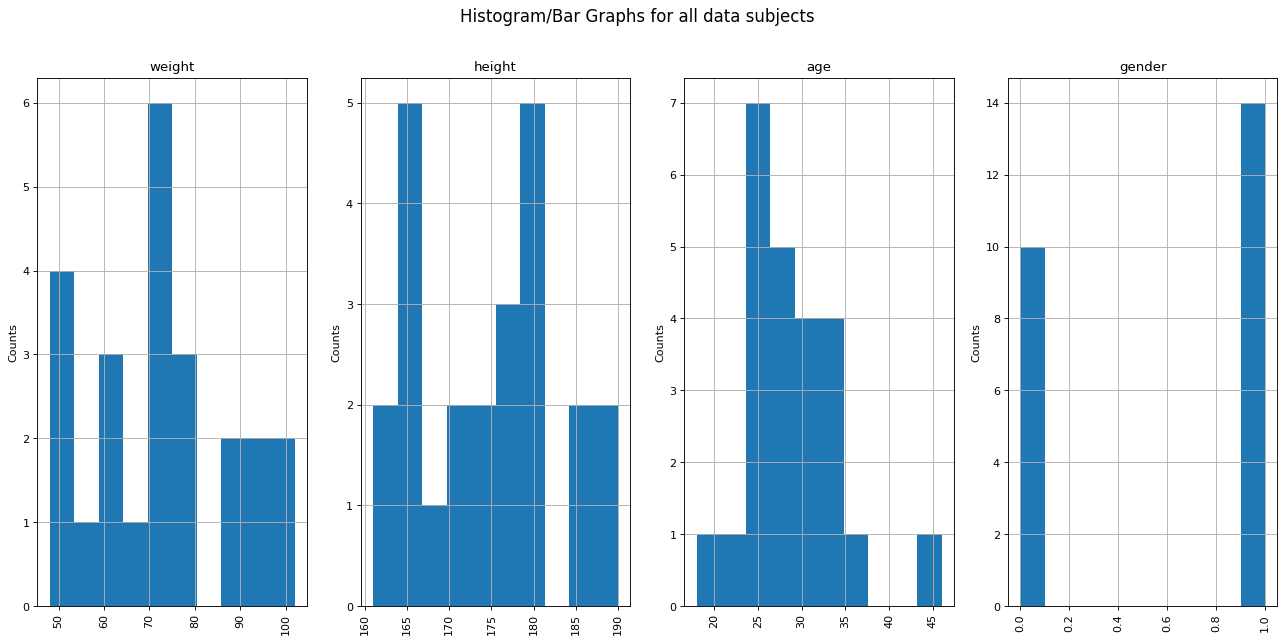

In [ ]:
#@title
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (5 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    #plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.suptitle(f'Histogram/Bar Graphs for all data subjects', fontsize=15)
    plt.show()

plotPerColumnDistribution(Reduceddf1, 10, 4)

Generate Correlation Matrix

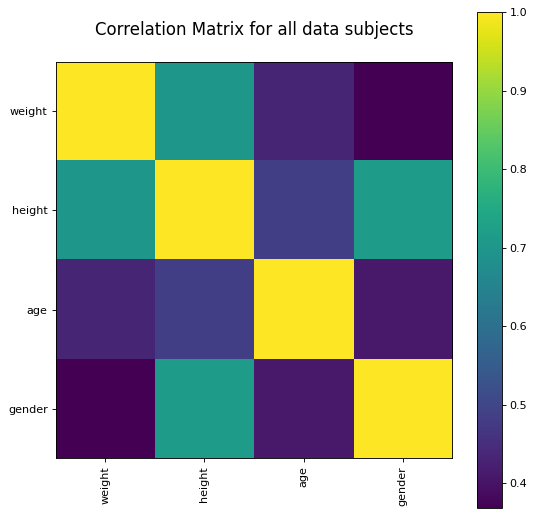

In [ ]:
#@title
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for all data subjects', fontsize=15)
    plt.show()

plotCorrelationMatrix(Reduceddf1, 8)

Generate Scatter and Density Plot

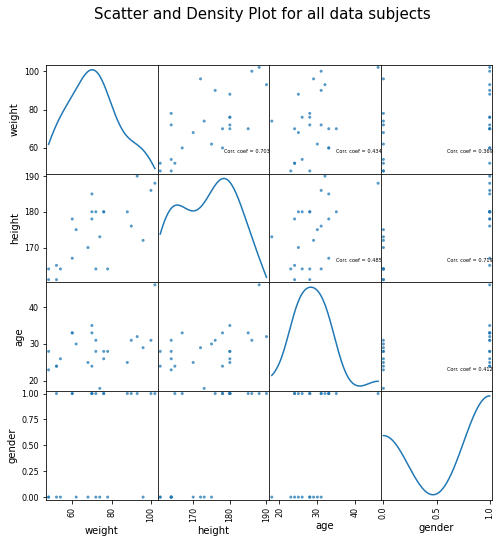

In [ ]:
#@title
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle(f'Scatter and Density Plot for all data subjects', fontsize=15)
    #plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(Reduceddf1, 8, 5)

Split male and female

In [ ]:
#@title
#Split male and female code
Male = Reduceddf1.loc[(Reduceddf1['gender'] >= 1)
                     & (Reduceddf1['gender'] < 2)]
Female = Reduceddf1.loc[(Reduceddf1['gender'] >= 0)
                     & (Reduceddf1['gender'] < 1)]


###Male Participants

Key statistics

In [ ]:
#@title
Male[["weight"]].apply(np.mean).mean()
wmean = Male[["weight"]].values.mean()
Male[["weight"]].apply(np.min).min()
wmin = Male[["weight"]].values.min()  
Male[["weight"]].apply(np.max).max()
wmax = Male[["weight"]].values.max() 
Male[["height"]].apply(np.mean).mean()
hmean = Male[["height"]].values.mean()
Male[["height"]].apply(np.min).min()
hmin = Male[["height"]].values.min()  
Male[["height"]].apply(np.max).max()
hmax = Male[["height"]].values.max() 
Male[["age"]].apply(np.mean).mean()
amean = Male[["age"]].values.mean()
Male[["age"]].apply(np.min).min()
amin = Male[["age"]].values.min()  
Male[["age"]].apply(np.max).max()
amax = Male[["age"]].values.max() 
print('Weight - average: {:.2f}kg, minimum: {:.2f}kg, maximum: {:.2f}kg'.format(wmean, wmin, wmax))
print('Height - average: {:.2f}cm, minimum: {:.2f}cm, maximum: {:.2f}cm'.format(hmean, hmin, hmax))
print('Age - average: {:.2f}yrs, minimum: {:.2f}yrs, maximum: {:.2f}yrs'.format(amean, amin, amax))

Weight - average: 77.07kg, minimum: 52.00kg, maximum: 102.00kg
Height - average: 179.50cm, minimum: 165.00cm, maximum: 190.00cm
Age - average: 30.64yrs, minimum: 24.00yrs, maximum: 46.00yrs


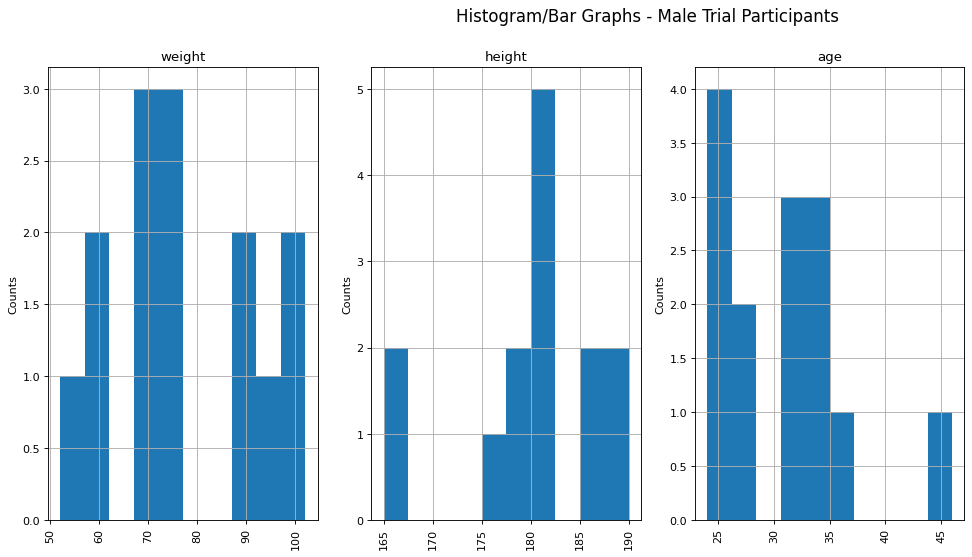

In [ ]:
#@title
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (5 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    #plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.suptitle(f'Histogram/Bar Graphs - Male Trial Participants', fontsize=15)
    plt.show()

plotPerColumnDistribution(Male, 10, 4)

Correlation matrix for males

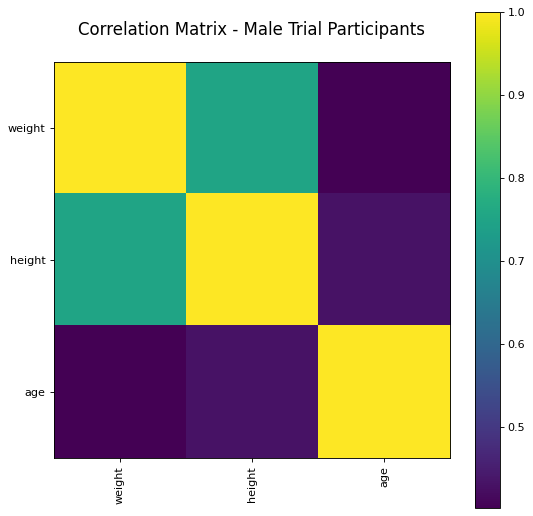

In [ ]:
#@title
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix - Male Trial Participants', fontsize=15)
    plt.show()

plotCorrelationMatrix(Male, 8)

The strongest correlation is between height and weight for male participants. The other attributes of age and weight, height and age show very little to no correlation.

Scatter and density plot for males

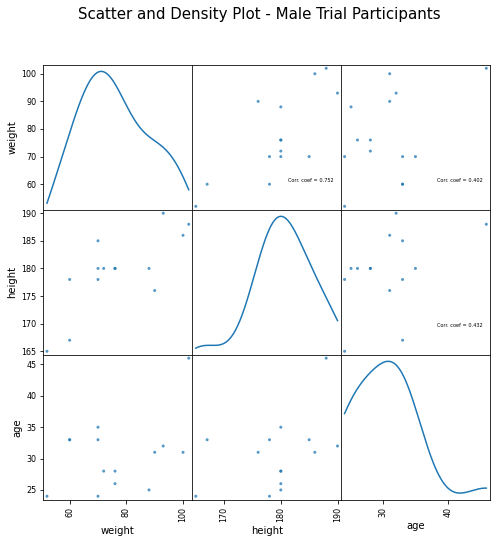

In [ ]:
#@title
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle(f'Scatter and Density Plot - Male Trial Participants', fontsize=15)
    #plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(Male, 8, 5)

###Female Participants

Key statistics

In [ ]:
#@title
Female[["weight"]].apply(np.mean).mean()
wmean = Female[["weight"]].values.mean()
Female[["weight"]].apply(np.min).min()
wmin = Female[["weight"]].values.min()  
Female[["weight"]].apply(np.max).max()
wmax = Female[["weight"]].values.max() 
Female[["height"]].apply(np.mean).mean()
hmean = Female[["height"]].values.mean()
Female[["height"]].apply(np.min).min()
hmin = Female[["height"]].values.min()  
Female[["height"]].apply(np.max).max()
hmax = Female[["height"]].values.max() 
Female[["age"]].apply(np.mean).mean()
amean = Female[["age"]].values.mean()
Female[["age"]].apply(np.min).min()
amin = Female[["age"]].values.min()  
Female[["age"]].apply(np.max).max()
amax = Female[["age"]].values.max() 
print('Weight - average: {:.2f}kg, minimum: {:.2f}kg, maximum: {:.2f}kg'.format(wmean, wmin, wmax))
print('Height - average: {:.2f}cm, minimum: {:.2f}cm, maximum: {:.2f}cm'.format(hmean, hmin, hmax))
print('Age - average: {:.2f}yrs, minimum: {:.2f}yrs, maximum: {:.2f}yrs'.format(amean, amin, amax))

Weight - average: 65.20kg, minimum: 48.00kg, maximum: 96.00kg
Height - average: 166.80cm, minimum: 161.00cm, maximum: 175.00cm
Age - average: 26.20yrs, minimum: 18.00yrs, maximum: 31.00yrs


Histogram for females

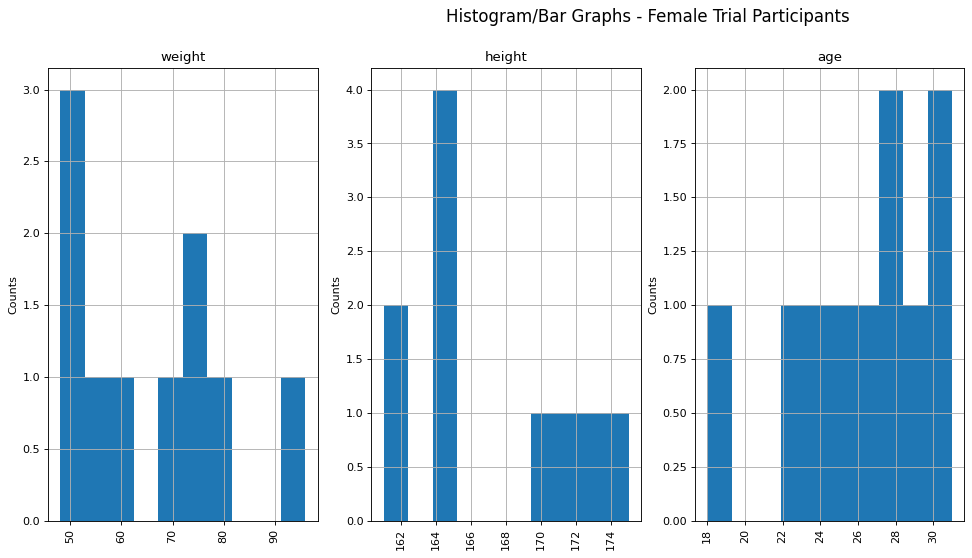

In [ ]:
#@title
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (5 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    #plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.suptitle(f'Histogram/Bar Graphs - Female Trial Participants', fontsize=15)
    plt.show()

plotPerColumnDistribution(Female, 10, 4)

Correlation matrix for females

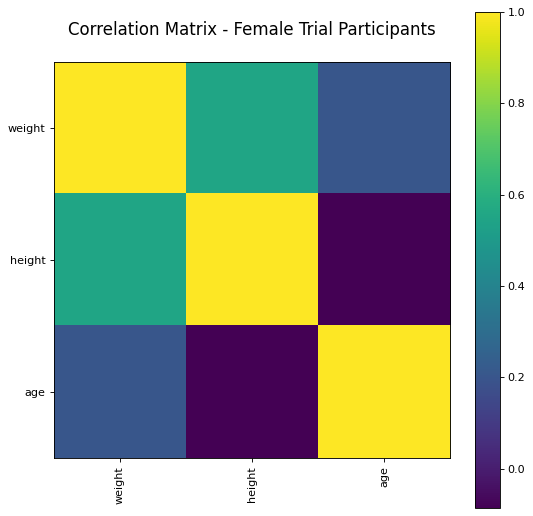

In [ ]:
#@title
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix - Female Trial Participants', fontsize=15)
    plt.show()

plotCorrelationMatrix(Female, 8)

There is a correlation between height and weight and a weaker correlation between age and weight for female participants.

Scatter and density plot for females

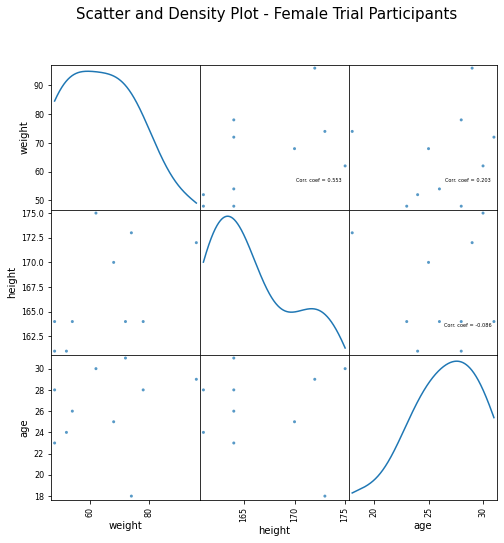

In [ ]:
#@title
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle(f'Scatter and Density Plot - Female Trial Participants', fontsize=15)
    #plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(Female, 8, 5)

##Summary

The histograms show variation in weight, height, age and gender of the participants in the trail. The average weight of all trail participants was 72kg, average height was 174.2cm and average age of 28.79 years. Fourteen males and ten females participated.

Average age of the female participants was 26.2 years, average height was 166.8cm and average weight was 65.2kg. Average age of the male participants was 30.6 years, average height was 179.5cm and average weight was 77.0kg.

The oldest, heaviest and tallest participants in the trial are males. The lightest, smallest and youngest are all female participants.

There is a correlation between height and weight and a weaker correlation between age and weight for female participants. For male participants, the only and strongest correlation is between height and weight. 